In [1]:
import os
os.getcwd()

'C:\\Users\\Gregs\\ML Projects'

# Import necessary library for the project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [3]:
path = 'C:\\Users\\Gregs\\anaconda3\\envs\\MLProject(LandPricing)\\'

In [4]:
df1 = pd.read_csv(path + "properties.csv")
df1.head()

,Description,Location,Category,Sub-Category,Land Size(M2),Building Size(M2),Car Space,Bedrooms,Bathrooms,Longitude,Latitude,Condominum Name,Price(Php),Link
0,Rush Sale! 3Bedroom Condo Unit in McKinley Gar...,"McKinley Hill, Taguig",Condominium,"Condominium,3-bedroom",None,128,None,3,2,121.055300,14.537120,McKinley Garden Villas,19000000.0,https://www.lamudi.com.ph/rush-sale-3bedroom-c...
1,Starts at 13K/MO Pre Selling House & Lot in Bu...,"Sapang Maisac, Mexico",House,"House,single-family-house",101,60,None,3,2,120.665111,15.169115,None,3700000.0,https://www.lamudi.com.ph/starts-at-13k-mo-pre...
2,Pretty Bungalow House in Catalunan Grande Dava...,"Catalunan Grande, Davao",House,"House,single-family-house",100,75,None,3,2,125.534347,7.090939,None,3790000.0,https://www.lamudi.com.ph/pretty-bungalow-hous...
3,Narvacan Ilocos Sur Farm lot For Sale (Along B...,"Margaay, Narvacan",Land,"Land,agricutural-lot",6132,None,None,None,None,120.470266,17.430680,None,3066000.0,https://www.lamudi.com.ph/narvacan-farm-lot-fo...
4,Re-Opened Prime Beach Lot in Playa Laiya,"Laiya-Aplaya, San Juan",Land,"Land,beach-lot",537,None,None,None,None,121.379905,13.691466,None,20191200.0,https://www.lamudi.com.ph/re-opened-prime-beac...


In [5]:
df1.shape

(3000, 14)

# Data cleaning process

In [6]:
df1.groupby('Location')['Location'].agg('count')

Location
A. Dalusag, General Emilio Aguinaldo    1
A. Mabini, Caloocan                     2
A. Sandoval Avenue, Pasig               2
Addition Hills, Mandaluyong             3
Addition Hills, San Juan                1
                                       ..
Yapak, Malay                            6
Yulo-Arroyo, Iloilo                     1
Zambal, Tagaytay                        5
Zapote, Binan                           2
Zaragosa, Aloguinsan                    1
Name: Location, Length: 788, dtype: int64

In [7]:
df2 = df1.drop(['Description','Category', 'Sub-Category', 'Car Space', 'Longitude', 'Latitude', 'Condominum Name', 'Link'], axis='columns')
df2.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
0,"McKinley Hill, Taguig",None,128,3,2,19000000.0
1,"Sapang Maisac, Mexico",101,60,3,2,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2,3790000.0
3,"Margaay, Narvacan",6132,None,None,None,3066000.0
4,"Laiya-Aplaya, San Juan",537,None,None,None,20191200.0


In [8]:
df2.isnull().sum()

Location             0
Land Size(M2)        0
Building Size(M2)    0
Bedrooms             0
Bathrooms            0
Price(Php)           0
dtype: int64

In [9]:
df3 = df2.replace('None', np.nan)
df3.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
0,"McKinley Hill, Taguig",NaN,128,3,2,19000000.0
1,"Sapang Maisac, Mexico",101,60,3,2,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2,3790000.0
3,"Margaay, Narvacan",6132,NaN,NaN,NaN,3066000.0
4,"Laiya-Aplaya, San Juan",537,NaN,NaN,NaN,20191200.0


In [10]:
df3 = df3.replace('0', np.nan)
df3.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
0,"McKinley Hill, Taguig",NaN,128,3,2,19000000.0
1,"Sapang Maisac, Mexico",101,60,3,2,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2,3790000.0
3,"Margaay, Narvacan",6132,NaN,NaN,NaN,3066000.0
4,"Laiya-Aplaya, San Juan",537,NaN,NaN,NaN,20191200.0


In [11]:
df3.shape

(3000, 6)

In [12]:
df4 = df3.dropna()
df4.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
1,"Sapang Maisac, Mexico",101,60,3,2,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2,3790000.0
8,"Telabastagan, San Fernando",240,440,4,5,19700000.0
10,"Ayala Alabang, Muntinlupa",570,900,6,6,235000000.0
19,"San Roque, Paombong",80,85,3,2,4100000.0


In [13]:
df4.shape

(1184, 6)

In [14]:
df4['Bathrooms'].unique()

array(['2', '5', '6', '1', '3', '10', '4', '5.5', '8', '2.5', '9', '3.5',
       '7', '4.5', '17', '12', '11'], dtype=object)

In [15]:
df4.tail()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
2991,"Santo Nino, Binan",60,90,3,2,4800000.0
2992,"Santo Nino, Binan",80,90,3,2,5300000.0
2993,"Matandang Balara, Quezon City",480,820,5,5,160000000.0
2994,"Greenhills, San Juan",315,500,4,4,65000000.0
2995,"Mariblo, Quezon City",640,700,5,4,45500000.0


In [16]:
df4['Bathrooms'] = pd.to_numeric(df4['Bathrooms'], errors='coerce')

C:\Users\Gregs\AppData\Local\Temp\ipykernel_14388\2667463206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Bathrooms'] = pd.to_numeric(df4['Bathrooms'], errors='coerce')


In [17]:
df4.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
1,"Sapang Maisac, Mexico",101,60,3,2.0,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2.0,3790000.0
8,"Telabastagan, San Fernando",240,440,4,5.0,19700000.0
10,"Ayala Alabang, Muntinlupa",570,900,6,6.0,235000000.0
19,"San Roque, Paombong",80,85,3,2.0,4100000.0


In [18]:
df4['Bathrooms'].unique()

array([ 2. ,  5. ,  6. ,  1. ,  3. , 10. ,  4. ,  5.5,  8. ,  2.5,  9. ,
        3.5,  7. ,  4.5, 17. , 12. , 11. ])

In [19]:
df4[df4.Bathrooms > 12]

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
655,"Mambugan, Antipolo",2186,2500,10,17.0,421800000.0
668,"San Juan, Antipolo",2186,2500,10,17.0,10000000.0
669,"San Juan, Antipolo",2186,2500,10,17.0,10000000.0
670,"San Juan, Antipolo",2186,2500,10,17.0,10000000.0
671,"San Juan, Antipolo",2186,2500,10,17.0,10000000.0
877,"San Juan, Cainta",2186,2500,10,17.0,350000000.0
878,"San Juan, Cainta",2186,2500,10,17.0,350000000.0
879,"San Juan, Cainta",2186,2500,10,17.0,350000000.0
980,"Mambugan, Antipolo",2186,2500,10,17.0,421800000.0
981,"San Juan, Cainta",2186,2500,10,17.0,421800000.0


In [20]:
df5 = df4.drop_duplicates()

In [21]:
df5.shape

(975, 6)

In [22]:
df5[df5.Bathrooms > 12]

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
655,"Mambugan, Antipolo",2186,2500,10,17.0,421800000.0
668,"San Juan, Antipolo",2186,2500,10,17.0,10000000.0
877,"San Juan, Cainta",2186,2500,10,17.0,350000000.0
981,"San Juan, Cainta",2186,2500,10,17.0,421800000.0
983,"San Isidro, Antipolo",2186,2500,10,17.0,421800000.0
993,"San Isidro, Cainta",2186,2500,10,17.0,421800000.0


# Creation of a function to select rows on a column with a float data type as a part of data cleaning

In [23]:
# create a function to detect value in a column if float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df5[~df5['Bedrooms'].apply(is_float)].head(20)

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)


In [25]:
df5.head(10)

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
1,"Sapang Maisac, Mexico",101,60,3,2.0,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2.0,3790000.0
8,"Telabastagan, San Fernando",240,440,4,5.0,19700000.0
10,"Ayala Alabang, Muntinlupa",570,900,6,6.0,235000000.0
19,"San Roque, Paombong",80,85,3,2.0,4100000.0
21,"Mulig, Davao",100,35.1,2,1.0,2300000.0
22,"San Roque, Cainta",76,125,3,3.0,5400000.0
32,"Camp 7, Baguio",191,300,5,5.0,21000000.0
37,"Francisco, Tagaytay",680,2000,9,10.0,85000000.0
38,"Greenhills, San Juan",232,502,4,4.0,53815248.6


# Feature Engineering will be helpful for outlier detection and removal 

In [26]:
df6 = df5.copy()
df6.head(3)

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php)
1,"Sapang Maisac, Mexico",101,60,3,2.0,3700000.0
2,"Catalunan Grande, Davao",100,75,3,2.0,3790000.0
8,"Telabastagan, San Fernando",240,440,4,5.0,19700000.0


In [27]:
df6['Land Size(M2)'] = pd.to_numeric(df6['Land Size(M2)'], errors='coerce')
df6['Building Size(M2)'] = pd.to_numeric(df6['Building Size(M2)'], errors='coerce')
df6['Bedrooms'] = pd.to_numeric(df6['Bedrooms'], errors='coerce')
df6['Bathrooms'] = pd.to_numeric(df6['Bathrooms'], errors='coerce')
df6['Price(Php)'] = pd.to_numeric(df6['Price(Php)'], errors='coerce')
df6['price_per_sqm'] = df6['Price(Php)']/df6['Land Size(M2)']
df6.head()

,Location,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,"Sapang Maisac, Mexico",101.0,60.0,3.0,2.0,3700000.0,36633.663366
2,"Catalunan Grande, Davao",100.0,75.0,3.0,2.0,3790000.0,37900.000000
8,"Telabastagan, San Fernando",240.0,440.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,900.0,6.0,6.0,235000000.0,412280.701754
19,"San Roque, Paombong",80.0,85.0,3.0,2.0,4100000.0,51250.000000


In [28]:
df6 = df6.drop(['Building Size(M2)'], axis='columns')
df6.head()

,Location,Land Size(M2),Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,"Sapang Maisac, Mexico",101.0,3.0,2.0,3700000.0,36633.663366
2,"Catalunan Grande, Davao",100.0,3.0,2.0,3790000.0,37900.000000
8,"Telabastagan, San Fernando",240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,"San Roque, Paombong",80.0,3.0,2.0,4100000.0,51250.000000


In [29]:
df6.rename(columns={'Land Size(M2)': 'land_size_sqm'}, inplace=True)
df6.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,"Sapang Maisac, Mexico",101.0,3.0,2.0,3700000.0,36633.663366
2,"Catalunan Grande, Davao",100.0,3.0,2.0,3790000.0,37900.000000
8,"Telabastagan, San Fernando",240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,"San Roque, Paombong",80.0,3.0,2.0,4100000.0,51250.000000


In [30]:
# show how many unique values from the column 'Location'
len(df6.Location.unique())

376

In [31]:
df6.shape

(975, 6)

In [32]:
# use lambda function to remove trailing and leading whitespaces return back 
# value to the column
df6.Location = df6.Location.apply(lambda x: x.strip())

# group the unique location and apply aggregate function with arg count 
# that calculate the total occurence of the unique location in the column
location_stats = df6.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
B.F. Homes, Paranaque         39
Talon Dos, Las Pinas          25
Pilar, Las Pinas              24
Almanza Dos, Las Pinas        20
Ayala Alabang, Muntinlupa     19
                              ..
Cararayan, Naga                1
Capitol Subdivision, Pasig     1
Guinsay, Danao                 1
Capitangan, Abucay             1
Calulut, San Fernando          1
Name: Location, Length: 376, dtype: int64

In [33]:
location_stats.shape

(376,)

In [34]:
location_stats.head(376)

Location
B.F. Homes, Paranaque         39
Talon Dos, Las Pinas          25
Pilar, Las Pinas              24
Almanza Dos, Las Pinas        20
Ayala Alabang, Muntinlupa     19
                              ..
Cararayan, Naga                1
Capitol Subdivision, Pasig     1
Guinsay, Danao                 1
Capitangan, Abucay             1
Calulut, San Fernando          1
Name: Location, Length: 376, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

365

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Location
Commonwealth, Quezon City     9
Poblacion, Muntinlupa         9
Alabang, Muntinlupa           9
Molino III, Bacoor            9
Talon Kuatro, Las Pinas       8
                             ..
Cararayan, Naga               1
Capitol Subdivision, Pasig    1
Guinsay, Danao                1
Capitangan, Abucay            1
Calulut, San Fernando         1
Name: Location, Length: 365, dtype: int64

In [37]:
len(df6.Location.unique())

376

In [38]:
df6.location = df6.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

C:\Users\Gregs\AppData\Local\Temp\ipykernel_14388\2906193327.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df6.location = df6.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


12

In [39]:
df6.location.head()

1                         other
2                         other
8                         other
10    Ayala Alabang, Muntinlupa
19                        other
Name: Location, dtype: object

In [40]:
location_stats_less_than_10

Location
Commonwealth, Quezon City     9
Poblacion, Muntinlupa         9
Alabang, Muntinlupa           9
Molino III, Bacoor            9
Talon Kuatro, Las Pinas       8
                             ..
Cararayan, Naga               1
Capitol Subdivision, Pasig    1
Guinsay, Danao                1
Capitangan, Abucay            1
Calulut, San Fernando         1
Name: Location, Length: 365, dtype: int64

In [41]:
df6.location.unique()

array(['other', 'Ayala Alabang, Muntinlupa', 'Almanza Dos, Las Pinas',
       'Talon Dos, Las Pinas', 'B.F. Homes, Paranaque',
       'Talon Singko, Las Pinas', 'Pilar, Las Pinas',
       'San Isidro, Cainta', 'Don Bosco, Paranaque',
       'Matandang Balara, Quezon City', 'Molino IV, Bacoor',
       'Merville, Paranaque'], dtype=object)

In [42]:
df6.head(5)

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,"Sapang Maisac, Mexico",101.0,3.0,2.0,3700000.0,36633.663366
2,"Catalunan Grande, Davao",100.0,3.0,2.0,3790000.0,37900.000000
8,"Telabastagan, San Fernando",240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,"San Roque, Paombong",80.0,3.0,2.0,4100000.0,51250.000000


In [43]:
df6.Location = df6.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

12

In [44]:
df6.head(5)

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,other,101.0,3.0,2.0,3700000.0,36633.663366
2,other,100.0,3.0,2.0,3790000.0,37900.000000
8,other,240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,other,80.0,3.0,2.0,4100000.0,51250.000000


# Outlier detection and removal

In [45]:
df6.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,other,101.0,3.0,2.0,3700000.0,36633.663366
2,other,100.0,3.0,2.0,3790000.0,37900.000000
8,other,240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,other,80.0,3.0,2.0,4100000.0,51250.000000


In [46]:
df6[df6.land_size_sqm/df6.Bedrooms <10].head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1687,other,36.00,4.0,1.0,2000000.0,55555.555556
2887,other,25.76,3.0,3.0,8800000.0,341614.906832


In [47]:
df6.shape

(975, 6)

In [48]:
# filter properties with standard bedroom area of 10sqm
df7 = df6[~(df6.land_size_sqm/df6.Bedrooms <10)]
df7.shape

(973, 6)

In [49]:
df7.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
1,other,101.0,3.0,2.0,3700000.0,36633.663366
2,other,100.0,3.0,2.0,3790000.0,37900.000000
8,other,240.0,4.0,5.0,19700000.0,82083.333333
10,"Ayala Alabang, Muntinlupa",570.0,6.0,6.0,235000000.0,412280.701754
19,other,80.0,3.0,2.0,4100000.0,51250.000000


In [50]:
df7.price_per_sqm.describe()

count       973.000000
mean     112794.634206
std      104072.512258
min        1873.360809
25%       52500.000000
50%       81695.906433
75%      125000.000000
max      741427.247451
Name: price_per_sqm, dtype: float64

In [51]:
# creating a function to remove outliers in column price_per_sqm
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # creating an empty dataframe
    for key, subdf in df.groupby('Location'):  # df dataframe is grouped by 'Location' column, and for each group, the group 
                                               # key ('Location') and the corresponding subgroup 'subdf' are obtained
        m = np.mean(subdf.price_per_sqm)  # calculate the mean within the subgroup created for column 'price_per_sqm'
        st = np.std(subdf.price_per_sqm)  # calculate the standard deviation within the subgroup created for column 'price_per_sqm'
        reduced_df = subdf[(subdf.price_per_sqm>(m-st)) & (subdf.price_per_sqm<=(m+st))]  # created new df by filtering rows
                                                                                          # of the subgroupthe satisfy the cond..
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # link the empty df to the reduced_df and the df has continuous index
    return df_out

df8 = remove_pps_outliers(df7)
df8.shape

(820, 6)

In [52]:
df8.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
0,"Almanza Dos, Las Pinas",350.0,3.0,5.5,55000000.0,157142.857143
1,"Almanza Dos, Las Pinas",467.0,3.0,5.0,65000000.0,139186.295503
2,"Almanza Dos, Las Pinas",267.0,4.0,4.0,38003100.0,142333.707865
3,"Almanza Dos, Las Pinas",120.0,3.0,2.0,18000000.0,150000.000000
4,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34242500.0,142677.083333


In [53]:
df8.shape

(820, 6)

In [54]:
df8.groupby('Location')['Location'].agg('count')

Location
Almanza Dos, Las Pinas            13
Ayala Alabang, Muntinlupa         10
B.F. Homes, Paranaque             25
Don Bosco, Paranaque              12
Matandang Balara, Quezon City      7
Merville, Paranaque               13
Molino IV, Bacoor                  7
Pilar, Las Pinas                  17
San Isidro, Cainta                11
Talon Dos, Las Pinas              18
Talon Singko, Las Pinas            9
other                            678
Name: Location, dtype: int64

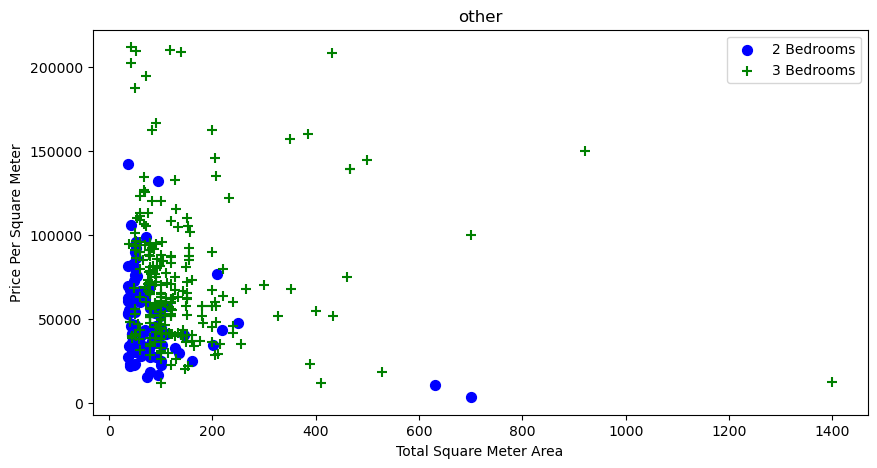

In [55]:
# creating a function to plot a scatter chart comparing the land_size_sqm with the price_per_sqm for specific location
def plot_scatter_chart(df, Location):
    br2 = df[(df.Location==Location) & (df.Bedrooms==2)]  # create new dataframe containing rows where location have bedrooms isequal to 2
    br3 = df[(df.Location==Location) & (df.Bedrooms==3)]  # create new dataframe containing rows where location have bedrooms is equal to 3
    matplotlib.rcParams['figure.figsize'] = (10,5)  # set the size of the figure for scatter plot in inches
    plt.scatter(br2.land_size_sqm,br2.price_per_sqm,color='blue',label='2 Bedrooms', s=50)  # create scatter plots for properties with 2 bedrooms assigning color & label to differentiate the two category
    plt.scatter(br3.land_size_sqm,br3.price_per_sqm,marker='+', color='green', label='3 Bedrooms', s=50) # create scatter plots for properties with 3 bedrooms assigning color, label, and marker to differentiate the two category
    plt.xlabel("Total Square Meter Area")  # assigning the y-axis label
    plt.ylabel("Price Per Square Meter")  # assigning the x-axis label
    plt.title(Location)  # assigning the plot title
    plt.legend()  # display the label on the plot to differentiate the two categories
    
plot_scatter_chart(df8, "other")

In [56]:
#  create a function that removes outlier based on the price_per_sqm column considering the properties in different locations and with varying number of bedrooms
def remove_br_outliers(df):
    exclude_indices = np.array([])  # initialize an empty NumPy array which will be used to store rows indices of the Df  to be excluded or be considered outliers
    for Location, location_df in df.groupby('Location'):  # group by location and then iterates through each group using for loop
        br_stats = {}  # created a dictionary that stores calculated mean, standard deviation and count
        for Bedrooms, br_df in location_df.groupby('Bedrooms'):  # iterate through each group of properties with the same number of bedrooms within each location using this loop
            br_stats[Bedrooms] = {
                'mean': np.mean(br_df.price_per_sqm),
                'std': np.std(br_df.price_per_sqm),
                'count': br_df.shape[0]
            }
        for Bedrooms, br_df in location_df.groupby('Bedrooms'):
            stats = br_stats.get(Bedrooms-1)  # looking for statistics of properties with one less bedroom 
            if stats and stats['count']>5:  # check if there are at least 5 properties with that number of bedrooms
                exclude_indices = np.append(exclude_indices, br_df[br_df.price_per_sqm<(stats['mean'])].index.values)  # if satisfied that put tp the excluded indices or outliers
    return df.drop(exclude_indices,axis='index')  # dropping the rows that satisfies the condition
df9 = remove_br_outliers(df8)
df9.shape

(558, 6)

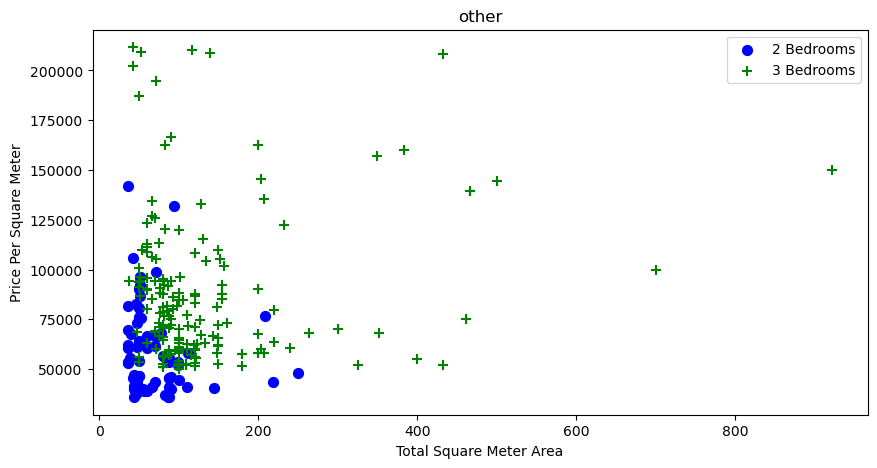

In [57]:
plot_scatter_chart(df9, "other")

Text(0, 0.5, 'Count')

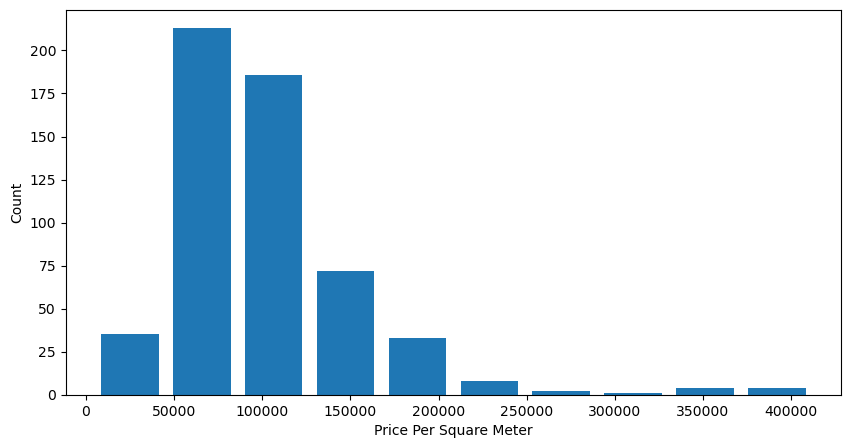

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df9.price_per_sqm,rwidth=0.8)
plt.xlabel("Price Per Square Meter")
plt.ylabel("Count")

In [59]:
df9.Bedrooms.unique()

array([ 3. ,  4. ,  6. ,  7. ,  5. ,  8. ,  2. , 10. ,  1. ,  5.5, 11. ,
       12. ])

In [60]:
# create a function that will remove fraction/decimal row with respect to bedrooms and bathrooms
def remove_decimal_fraction_rows_in_column(df, column_name):
    def contains_decimal_or_fraction(value):  # convery each cells to content to a float and check if the float value is an integer
        try:
            float_value = float(value)  
            return float_value.is_integer()
        except ValueError:
            return False

    mask = df[column_name].apply(contains_decimal_or_fraction)  # applied the function on each cell for specified column. The result are series of boolean values where true indicated
                                                                # cells with decimal or fraction and false indicated cells with integers or non-numeric values
    filtered_df = df[mask]
    return filtered_df

df10 = remove_decimal_fraction_rows_in_column(df9, "Bedrooms")
df10.shape

(557, 6)

In [61]:
df10.Bedrooms.unique()

array([ 3.,  4.,  6.,  7.,  5.,  8.,  2., 10.,  1., 11., 12.])

In [62]:
df10 = remove_decimal_fraction_rows_in_column(df10, "Bathrooms")
df10.shape

(550, 6)

In [63]:
df10.Bathrooms.unique()

array([ 5.,  4.,  2.,  3.,  6.,  7.,  8., 10.,  1., 17.,  9., 12., 11.])

In [64]:
df10[df10.Bathrooms>10]

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
312,other,2186.0,10.0,17.0,421800000.0,192955.169259
313,other,2186.0,10.0,17.0,10000000.0,4574.565416
355,other,2186.0,10.0,17.0,350000000.0,160109.789570
382,other,2186.0,10.0,17.0,421800000.0,192955.169259
383,other,2186.0,10.0,17.0,421800000.0,192955.169259
413,other,650.0,10.0,12.0,65000000.0,100000.000000
653,other,600.0,8.0,11.0,95000000.0,158333.333333
676,other,600.0,8.0,11.0,95000000.0,158333.333333


Text(0, 0.5, 'Count')

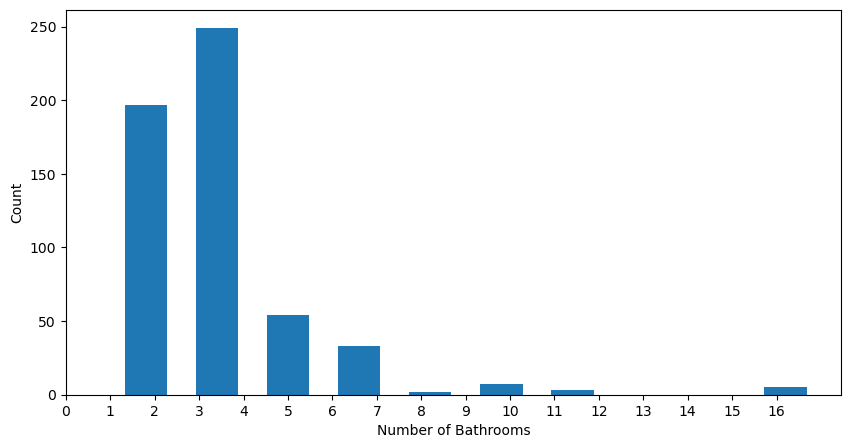

In [65]:
plt.hist(df10.Bathrooms,rwidth=0.6)
plt.xticks(range(17))
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [66]:
df10[df10.Bathrooms>df10.Bedrooms+2]

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
312,other,2186.0,10.0,17.0,421800000.0,192955.169259
313,other,2186.0,10.0,17.0,10000000.0,4574.565416
355,other,2186.0,10.0,17.0,350000000.0,160109.789570
382,other,2186.0,10.0,17.0,421800000.0,192955.169259
383,other,2186.0,10.0,17.0,421800000.0,192955.169259
653,other,600.0,8.0,11.0,95000000.0,158333.333333
676,other,600.0,8.0,11.0,95000000.0,158333.333333


In [67]:
df11 = df10[df10.Bathrooms<df10.Bedrooms+2]
df11.shape

(531, 6)

In [68]:
df11.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),price_per_sqm
2,"Almanza Dos, Las Pinas",267.0,4.0,4.0,38003100.0,142333.707865
3,"Almanza Dos, Las Pinas",120.0,3.0,2.0,18000000.0,150000.000000
4,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34242500.0,142677.083333
5,"Almanza Dos, Las Pinas",120.0,4.0,4.0,19817000.0,165141.666667
6,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34240000.0,142666.666667


In [69]:
df12 = df11.drop(['price_per_sqm'],axis='columns')
df12.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php)
2,"Almanza Dos, Las Pinas",267.0,4.0,4.0,38003100.0
3,"Almanza Dos, Las Pinas",120.0,3.0,2.0,18000000.0
4,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34242500.0
5,"Almanza Dos, Las Pinas",120.0,4.0,4.0,19817000.0
6,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34240000.0


# Model Building
## Since machine learning model cannot interpret text data converting text column into numerical information. Using One-hot encoding aka. dummies.
### - One-hot encoding is a way to represent categorical variables as binary vectors

In [70]:
dummies = pd.get_dummies(df12.Location)  # pd.getdummies - function from pandas to create dummy variables aka one-hot encoding
dummies.head()

,"Almanza Dos, Las Pinas","Ayala Alabang, Muntinlupa","B.F. Homes, Paranaque","Don Bosco, Paranaque","Matandang Balara, Quezon City","Merville, Paranaque","Molino IV, Bacoor","Pilar, Las Pinas","San Isidro, Cainta","Talon Dos, Las Pinas","Talon Singko, Las Pinas",other
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df13 = pd.concat([df12, dummies.drop('other', axis='columns')], axis='columns')  # dropping 'other' column to avoid multicolliniearity, where one column can be perfectly predicted from
                                                                                 # other column. It ensures that the dummy variables are linearly independent
df13.head()

,Location,land_size_sqm,Bedrooms,Bathrooms,Price(Php),"Almanza Dos, Las Pinas","Ayala Alabang, Muntinlupa","B.F. Homes, Paranaque","Don Bosco, Paranaque","Matandang Balara, Quezon City","Merville, Paranaque","Molino IV, Bacoor","Pilar, Las Pinas","San Isidro, Cainta","Talon Dos, Las Pinas","Talon Singko, Las Pinas"
2,"Almanza Dos, Las Pinas",267.0,4.0,4.0,38003100.0,1,0,0,0,0,0,0,0,0,0,0
3,"Almanza Dos, Las Pinas",120.0,3.0,2.0,18000000.0,1,0,0,0,0,0,0,0,0,0,0
4,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34242500.0,1,0,0,0,0,0,0,0,0,0,0
5,"Almanza Dos, Las Pinas",120.0,4.0,4.0,19817000.0,1,0,0,0,0,0,0,0,0,0,0
6,"Almanza Dos, Las Pinas",240.0,4.0,4.0,34240000.0,1,0,0,0,0,0,0,0,0,0,0


In [72]:
df14 = df13.drop('Location', axis='columns')
df14.head(2)

,land_size_sqm,Bedrooms,Bathrooms,Price(Php),"Almanza Dos, Las Pinas","Ayala Alabang, Muntinlupa","B.F. Homes, Paranaque","Don Bosco, Paranaque","Matandang Balara, Quezon City","Merville, Paranaque","Molino IV, Bacoor","Pilar, Las Pinas","San Isidro, Cainta","Talon Dos, Las Pinas","Talon Singko, Las Pinas"
2,267.0,4.0,4.0,38003100.0,1,0,0,0,0,0,0,0,0,0,0
3,120.0,3.0,2.0,18000000.0,1,0,0,0,0,0,0,0,0,0,0


In [73]:
df14.shape

(531, 15)

## Start of building the model

In [95]:
X = df14.drop('Price(Php)', axis='columns')
X.head()

,land_size_sqm,Bedrooms,Bathrooms,"Almanza Dos, Las Pinas","Ayala Alabang, Muntinlupa","B.F. Homes, Paranaque","Don Bosco, Paranaque","Matandang Balara, Quezon City","Merville, Paranaque","Molino IV, Bacoor","Pilar, Las Pinas","San Isidro, Cainta","Talon Dos, Las Pinas","Talon Singko, Las Pinas"
2,267.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0
3,120.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0
4,240.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0
5,120.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0
6,240.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0


In [75]:
y = df13['Price(Php)']
y.head()

2    38003100.0
3    18000000.0
4    34242500.0
5    19817000.0
6    34240000.0
Name: Price(Php), dtype: float64

In [76]:
len(y)

531

In [96]:
from sklearn.model_selection import train_test_split  # function that split the data into training and testing sets for building and evaluationg a machine leaerning model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #20% will be used for testing while remaining 80% will be for training. data is randomly shuffled

In [97]:
from sklearn.linear_model import LinearRegression  # import LinearRegression() class, which is used to create a linear regression model.
lr_clf = LinearRegression()  # creating an instance of the LinearRegression() class and initializes it as lr_clf. This will represeng the linear regression model
lr_clf.fit(X_train,y_train)  # train the linear regression model using training data. Both input features for training and corresponding target values
lr_clf.score(X_test,y_test)  # evaluate the model's performance on the testing data. 

# returns coefficient of determination (R-squared) of the prediction. R-squared measures how well the linear regression model fits the data.

0.8498472218376962

In [79]:
from sklearn.model_selection import ShuffleSplit  # class that used to create a cross-validation strategy based on shuffling the data.
from sklearn.model_selection import cross_val_score  # a function used to perform cross-validation and obtain the scores for each fold

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # create instance named cv. Specify the cross-validation strategy. Data split into 5 folds each fold contains 20% of the 
                                                              # data. Ensure reproducibility so reconstructing the same model is possible

cross_val_score(LinearRegression(), X, y, cv=cv)  # perform cross-validation using linear regression model on the feature matrix X and target variable y using strategy by instance cv

array([0.9074159 , 0.71630236, 0.65011283, 0.8564317 , 0.85230705])

In [98]:
from sklearn.model_selection import GridSearchCV  # import gridsearchCV this is used to systematically seach for the best combination of hyperparameters for a given model

from sklearn.linear_model import Lasso  # import lasso regression model, which is lineare regression model with L1 regularization
from sklearn.tree import DecisionTreeRegressor  # a non-linear regression model based on decision tree algorithms

def find_best_model_using_gridsearchcv(X,y):  # define a new function to identify the best model among 3 diff algho(LR, Lasso, and Decision Tree Regressor) using hyperparameter tuning
                                              # with GridSearchCV
    algos = {  # dictionary that will contain 3 different algorithms. Each algorithm includes model class 'model' and hyperparameter grid 'params' for GridSearchCV
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []  # contain the disconaries with information about each algoritm's best model performance and hyperparameters
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # create an instance for ShuffleSplit cross-validation strategy
    for algo_name, config in algos.items():  # perform GridSearchCV for each alghorithm, finding the best hyperparams and model performance. 
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])  # returns a dataframe that summarizes the results

find_best_model_using_gridsearchcv(X,y)

C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.797836,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.796514,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.811746,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [99]:
X.columns

Index(['land_size_sqm', 'Bedrooms', 'Bathrooms', 'Almanza Dos, Las Pinas',
       'Ayala Alabang, Muntinlupa', 'B.F. Homes, Paranaque',
       'Don Bosco, Paranaque', 'Matandang Balara, Quezon City',
       'Merville, Paranaque', 'Molino IV, Bacoor', 'Pilar, Las Pinas',
       'San Isidro, Cainta', 'Talon Dos, Las Pinas',
       'Talon Singko, Las Pinas'],
      dtype='object')

In [100]:
def predict_price(Location,sqm,Bathrooms,Bedrooms):  # define a function that will predict price of a property based on input parameters
    loc_index = np.where(X.columns==Location)[0][0]  # fund the index of the column corresponding to the provided location in the feature x matrix

    x = np.zeros(len(X.columns))  # create a numpy array x filled with zeros equal to the number of columns in the feature matrix 'X'. Represents the input features for prediction
    x[0] = sqm  # represents the property in square meters
    x[1] = Bathrooms  # represents the number of bathrooms
    x[2] = Bedrooms  # represents the number of bedrooms
    if loc_index >= 0:
        x[loc_index] = 1  # the selected location's element will set to 1 if Location is found and skip if not 

    return lr_clf.predict([x])[0]  # return the predicted price

In [111]:
predict_price('Almanza Dos, Las Pinas',300, 2, 2)

C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32622809.203050617

In [114]:
predict_price('Merville, Paranaque',300, 2, 2)

C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26760043.5052636

In [106]:
predict_price('Almanza Dos, Las Pinas',300, 3, 4)

C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43556700.05887544

In [103]:
predict_price('Almanza Dos, Las Pinas',140, 1, 3)

C:\Users\Gregs\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30827631.28350771

In [115]:
import pickle  # module which provides a way to serialize Python objects such as models into binary representation and deserialize them back
with open('philippines_home_prices_model.pickle','wb') as f:  
    pickle.dump(lr_clf,f)  # using picke.dump() method. Model will be stored in binary format in the file f where trained linear regression model 'lr_clf' is serialized and saved

In [116]:
import json  # a module that provides functions for working with JSON data
columns = {  # discionary created 
    'data_columns' : [col.lower() for col in X.columns]  # key is 'data_colums' walues are converted to lower case. 
}
with open("columns.json","w") as f:  # open a file containing the JSON data of column names
    f.write(json.dumps(columns))  #writes the JSON representation of the columns dictionary to the file f